<a href="https://colab.research.google.com/github/Srishti20022/Data-Science/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
col_name = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml-100k/u.data', sep = '\t', names = col_name)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
df['user_id'].nunique()

943

In [7]:
df['item_id'].nunique()

1682

In [8]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml-100k/u.item', sep = '\|', header = None)

In [9]:
# df1

In [10]:
movie_title = df1[[0,1]]
movie_title.columns = ['item_id', 'title']

In [11]:
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [12]:
df = pd.merge(df, movie_title, on='item_id')

In [13]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


DATA ANALYSIS

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df.head(10)

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
5,296,242,4,884196057,Kolya (1996)
6,34,242,5,888601628,Kolya (1996)
7,271,242,4,885844495,Kolya (1996)
8,201,242,4,884110598,Kolya (1996)
9,209,242,4,883589606,Kolya (1996)


In [16]:
df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100000 non-null  int64 
 1   item_id    100000 non-null  int64 
 2   rating     100000 non-null  int64 
 3   timestamp  100000 non-null  int64 
 4   title      100000 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [18]:
df.size

500000

In [19]:
df.columns

Index(['user_id', 'item_id', 'rating', 'timestamp', 'title'], dtype='object')

In [20]:
for column in df:
    print(f"Number of unique categories in {column} is {df[column].nunique()}")

Number of unique categories in user_id is 943
Number of unique categories in item_id is 1682
Number of unique categories in rating is 5
Number of unique categories in timestamp is 49282
Number of unique categories in title is 1664


In [21]:
df.dtypes

user_id       int64
item_id       int64
rating        int64
timestamp     int64
title        object
dtype: object

In [22]:
# sub total on the basis of user_id
grp = df.groupby('title')
grp.count()

,user_id,item_id,rating,timestamp
title,,,,
'Til There Was You (1997),9,9,9,9
1-900 (1994),5,5,5,5
101 Dalmatians (1996),109,109,109,109
12 Angry Men (1957),125,125,125,125
187 (1997),41,41,41,41
...,...,...,...,...
Young Guns II (1990),44,44,44,44
"Young Poisoner's Handbook, The (1995)",41,41,41,41
Zeus and Roxanne (1997),6,6,6,6


In [23]:
# Average rating for a movie
df2 = df[['title', 'rating']]
grp = df2.groupby('title').mean()['rating']
grp
grp.sort_values(ascending=False)
# grp

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de d�cembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [24]:
# Count of number of people watched a particular movie and reviewed it
grp = df.groupby('title').count()['item_id']
grp.sort_values(ascending=False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
� k�ldum klaka (Cold Fever) (1994)              1
Name: item_id, Length: 1664, dtype: int64

In [25]:
df2 = df[['title', 'rating']]
grp = df2.groupby('title').mean()['rating']
ratings = pd.DataFrame(grp)
ratings['Number of Rating'] = df.groupby('title').count()['item_id']
ratings

,rating,Number of Rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [26]:
ratings = ratings.sort_values(by = 'rating', ascending=False)

In [27]:
ratings.head(10)

,rating,Number of Rating
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
"Great Day in Harlem, A (1994)",5.0,1
Aiqing wansui (1994),5.0,1
Santa with Muscles (1996),5.0,2
Prefontaine (1997),5.0,3


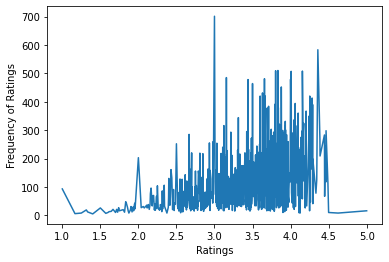

In [53]:
# Rating to the frequwncy of ratings
ploting = ratings.groupby(['rating'])['Number of Rating'].agg('sum')
plt.xlabel('Ratings')
plt.ylabel('Frequency of Ratings')
plt.plot(ploting)
plt.show()

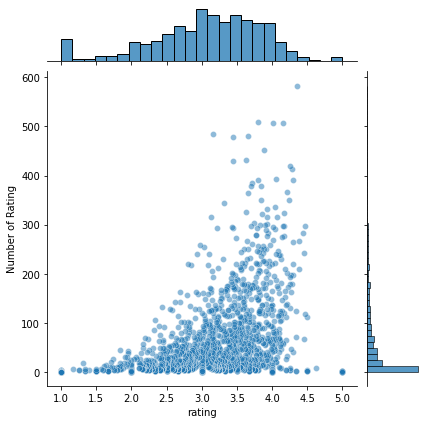

In [55]:
sns.jointplot(x= 'rating', y= 'Number of Rating', data=ratings, alpha = 0.5)

In [ ]:
# Movie recommendation from pandas

In [56]:
df.head(10)

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
5,296,242,4,884196057,Kolya (1996)
6,34,242,5,888601628,Kolya (1996)
7,271,242,4,885844495,Kolya (1996)
8,201,242,4,884110598,Kolya (1996)
9,209,242,4,883589606,Kolya (1996)


In [58]:
movie_matrix = df.pivot_table(index='user_id', columns= 'title', values= 'rating')

In [59]:
movie_matrix 

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [60]:
ratings.sort_values('Number of Rating', ascending=False).head()

,rating,Number of Rating
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [62]:
# Finding correlation
Star_Wars_ratings = movie_matrix['Star Wars (1977)']
# Star_Wars_ratings.head()
similar_to_startWars = movie_matrix.corrwith(Star_Wars_ratings)

In [75]:
corr_starwars = pd.DataFrame(similar_to_startWars, columns=['Correlation']).dropna()
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [76]:
corr_starwars = corr_starwars.join(ratings['Number of Rating'])
corr_starwars

,Correlation,Number of Rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [77]:
# Taking 100 ratings as threshold
corr_starwars[corr_starwars['Number of Rating'] > 100].sort_values('Correlation', ascending=False)

,Correlation,Number of Rating
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [78]:
def Movie_Recommendation(movie) :
    movie_ratings = movie_matrix[movie]
    similar_movie = movie_matrix.corrwith(movie_ratings)
    corr_movie = pd.DataFrame(similar_movie, columns=['Correlation'])
    corr_movie.dropna(inplace=True)

    corr_movie = corr_movie.join(ratings['Number of Rating'])
    Recommendation = corr_movie[corr_movie['Number of Rating']>100].sort_values('Correlation', ascending=False)
    return Recommendation

In [82]:
Recommendations = Movie_Recommendation('Crash (1996)')
Recommendations.head(10)

,Correlation,Number of Rating
title,,
Crash (1996),1.000000,128
Down Periscope (1996),0.737162,101
"Sex, Lies, and Videotape (1989)",0.664509,101
Monty Python's Life of Brian (1979),0.651013,174
Happy Gilmore (1996),0.536685,149
On Golden Pond (1981),0.508747,106
Alien: Resurrection (1997),0.495392,124
My Best Friend's Wedding (1997),0.488937,172
North by Northwest (1959),0.482017,179
